In [2]:
import pandas as pd 
import process
import numpy as np 
# Jerome path : r'C:\Users\33640\OneDrive\Documents\GitHub\Portfolio_clustering_project\Data\DataBase.csv'
# Nail path : '/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Data/DataBase.csv'
df = pd.read_csv(r'/Users/khelifanail/Documents/GitHub/Portfolio_clustering_project/Data/DataBase.csv')

df.set_index('ticker', inplace=True)

df.columns = pd.to_datetime(df.columns.str[1:], format='%Y%m%d').strftime('%d/%m/%Y')

df_cleaned = df.fillna(0) # Utilisez la méthode fillna(0) pour remplacer les NaN par 0

In [16]:
import warnings 


warnings.filterwarnings("ignore") ## so that there are no polluting warnings as output of this cell

lookback_window_0 = [0, 50]
number_of_clusters = 38
sigma = 10e-2
clustering_method = 'SPONGE' 
number_of_repetition = 20
number_of_window=50
evaluation_window = 5
eta_values = np.linspace(0.001, 0.02, 20)
np.set_printoptions(precision=4, suppress=True)

overall_return, PnL, portfolio_value, sharpe_ratio, daily_PnL = process.sliding_window(df_cleaned=df_cleaned, lookback_window_0=lookback_window_0, number_of_clusters=number_of_clusters, sigma=sigma, clustering_method=clustering_method, number_of_repetition=number_of_repetition, number_of_window=number_of_window, evaluation_window=evaluation_window, eta=eta_values[5])

1.0260544668215574
step 1
1.031222739157497
step 2
1.0355615940075273
step 3
1.0378175837587527
step 4
1.029633983035931
step 5
1.0388437463688893
step 6
1.0466415810351761
step 7
1.0412541776009179
step 8
1.046336196439736
step 9
1.0444114442069417
step 10
1.053504502945637
step 11
1.055233249034579
step 12
1.0660889754928067
step 13
1.0591335043400547
step 14
1.06416369503874
step 15
1.071234872352532
step 16
1.0774946341314418
step 17
1.0720505703393834
step 18
1.066040600883289
step 19
1.078143985230747
step 20
1.0889538054756518
step 21
1.0906172870921411
step 22
1.0887313929612976
step 23
1.0928943349303957
step 24
1.10548701627615
step 25
1.0926972854624315
step 26
1.0935890288843955
step 27
1.096548914293246
step 28
1.0900968739863526
step 29
1.0819257447947617
step 30
1.0851338956101246
step 31
1.099709120979101
step 32
1.1121265885252163
step 33
1.1125870959957695
step 34
1.1177716899024173
step 35
1.122490915042675
step 36
1.1295244585616016
step 37
1.1355824545211355
step 3

In [8]:
annualized_overall_return = (1 + overall_return)**252 - 1
sharpe_ratio = annualized_overall_return.mean()/annualized_overall_return.std()
sharpe_ratio

portfolio return    0.365842
dtype: float64

In [18]:
PnL[-1]

0.2254221854202223

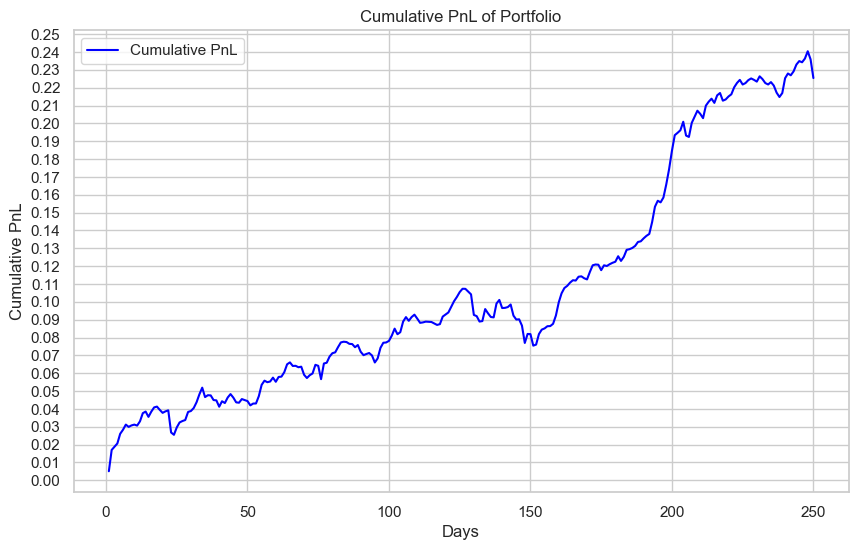

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Création de l'axe des abscisses (nombre de jours)
days = np.arange(1, len(PnL) + 1)

# Configuration de seaborn pour un style agréable
sns.set(style="whitegrid")

# Tracer la PnL cumulative avec seaborn
plt.figure(figsize=(10, 6))
sns.lineplot(x=days, y=PnL, label='Cumulative PnL', color='blue')

# Ajouter des titres et des légendes
plt.title('Cumulative PnL of Portfolio')
plt.xlabel('Days')
plt.ylabel('Cumulative PnL')

# Personnaliser l'axe des ordonnées avec un pas de 0.01
plt.yticks(np.arange(0, max(PnL) + 0.01, 0.01))

# Afficher le graphique
plt.show()

In [28]:
Results=[]
Results.append([overall_return, PnL, portfolio_value, sharpe_ratio])

In [29]:
Results

[[            portfolio return
  15/03/2000          0.004825
  16/03/2000          0.011746
  17/03/2000          0.001542
  20/03/2000          0.002010
  21/03/2000          0.005050
  ...                      ...
  06/03/2001         -0.000892
  07/03/2001          0.002064
  08/03/2001          0.003291
  09/03/2001         -0.003171
  12/03/2001         -0.008438
  
  [250 rows x 1 columns],
  array([0.  , 0.02, 0.02, 0.02, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03,
         0.03, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
         0.02, 0.02, 0.03, 0.03, 0.03, 0.03, 0.03, 0.03, 0.04, 0.04, 0.04,
         0.05, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04,
         0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.04, 0.05,
         0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.06, 0.06, 0.06, 0.06,
         0.06, 0.06, 0.06, 0.06, 0.05, 0.06, 0.06, 0.06, 0.06, 0.05, 0.06,
         0.06, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07, 0.07,

In [31]:
import warnings 


warnings.filterwarnings("ignore") ## so that there are no polluting warnings as output of this cell
for i in range(19):
    lookback_window_0 = [0+250*i, 50+250*i]
    number_of_clusters = 38
    sigma = 10e-2
    clustering_method = 'SPONGE' 
    number_of_repetition = 20
    number_of_window=50
    evaluation_window = 5
    eta=0.01

    overall_return, PnL, portfolio_value, sharpe_ratio = process.sliding_window(df_cleaned=df_cleaned, lookback_window_0=lookback_window_0, number_of_clusters=number_of_clusters, sigma=sigma, clustering_method=clustering_method, number_of_repetition=number_of_repetition, number_of_window=number_of_window, evaluation_window=evaluation_window, eta=eta)
    Results.append([overall_return, PnL, portfolio_value, sharpe_ratio])

1.0249424145643409
step 1
1.0303495333630828
step 2
1.0338972797307477
step 3
1.034941021913445
step 4
1.0249672225303152
step 5
1.0332452779002614
step 6
1.0417076172071187
step 7
1.0363517514241318
step 8
1.0410510542042357
step 9
1.0389803311364025
step 10
1.0478940366823193
step 11
1.0495160586839152
step 12
1.0597591095182302
step 13
1.05328051248995
step 14
1.0589397501592246
step 15
1.0674812445681099
step 16
1.0715958106142471
step 17
1.066269054648218
step 18
1.060408915006581
step 19
1.0729680694947257
step 20
1.0833253759021166
step 21
1.0847147839702196
step 22
1.080807870466408
step 23
1.083667377890155
step 24
1.096843026163705
step 25
1.0848356995226622
step 26
1.0856210261472146
step 27
1.088879489778831
step 28
1.0825916359191177
step 29
1.0729502716432244
step 30
1.0757414579152385
step 31
1.0918528086195736
step 32
1.1053398891795643
step 33
1.1069852622098593
step 34
1.1129397374057897
step 35
1.1160706970557597
step 36
1.1218241147792205
step 37
1.1265780442733562


ArpackNoConvergence: ARPACK error -1: ARPACK error -1: No convergence (371 iterations, 0/1 eigenvectors converged)


        CVXPY note: This failure was encountered while trying to certify
        that a matrix is positive semi-definite (see [1] for a definition).
        In rare cases, this method fails for numerical reasons even when the matrix is
        positive semi-definite. If you know that you're in that situation, you can
        replace the matrix A by cvxpy.psd_wrap(A).

        [1] https://en.wikipedia.org/wiki/Definite_matrix
        

In [47]:
Results[2][3]=(Results[2][2][-1]-1) / (Results[2][0].std()* np.sqrt(252))